In [1]:
# this allows the notebook to import src code in a sibling module
import load_package
__package__ = load_package.load()

In [2]:
from PIL import Image

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from src.utils.viz_utils import Diamond
from src.utils import geometry

# Load Data

In [3]:
df = pd.read_csv('../data/shortstopdefense.csv')

# Basic Describe Properties 

In [4]:
df.shape

(20151, 28)

In [5]:
df.describe()

,id,playerid,pos,player_x,player_y,player_vx,player_vy,fielded_pos,fieldingplay,launch_vert_ang,launch_horiz_ang,launch_speed,launch_spin_rate,launch_spin_axis,landing_location_radius,hang_time,landing_location_x,landing_location_y
count,2.015100e+04,2.015100e+04,20151.0,20151.000000,20151.000000,20150.000000,20150.000000,20149.000000,20149.000000,20151.000000,20151.000000,20151.000000,20151.000000,20151.000000,20151.000000,20151.000000,20151.000000,20151.000000
mean,4.100710e+06,1.173465e+05,6.0,-28.971390,141.779816,-0.078665,-0.658567,4.940990,123.912800,-13.141791,-2.333497,84.694749,1184.525353,65.221776,33.466502,0.278001,-0.718962,30.802565
std,8.345014e+04,6.363845e+05,0.0,26.980072,9.636706,1.720718,0.848344,1.939256,5382.472634,18.873764,25.709917,16.568660,1976.674000,105.683756,38.302243,0.348274,19.203079,35.623081
min,3.950199e+06,9.140000e+02,6.0,-92.644410,77.870670,-207.139500,-19.761500,1.000000,1.000000,-89.078700,-179.212800,11.622810,0.000000,0.000000,0.154567,0.000500,-98.023670,-9.475500
25%,4.028928e+06,9.424000e+03,6.0,-48.127575,136.736750,-0.471290,-1.014699,4.000000,8.000000,-21.978835,-24.252345,74.105195,0.000000,0.000000,6.250546,0.046997,-4.940391,5.747013
50%,4.100938e+06,1.591280e+05,6.0,-38.477160,141.916000,-0.051739,-0.465524,5.000000,43.000000,-8.417106,-4.218059,87.831870,0.000000,0.000000,14.696620,0.108032,-0.451211,13.635690
75%,4.172738e+06,1.679600e+05,6.0,-15.904500,148.819700,0.306395,-0.160282,6.000000,63.000000,0.759449,19.380115,97.581730,2140.799500,109.509500,49.995860,0.387573,3.459920,45.497970
max,4.245065e+06,4.492626e+07,6.0,101.815400,179.543900,11.190160,8.668196,9.000000,753436.000000,40.774880,159.784100,120.576400,7999.775000,359.948000,258.123000,2.837524,105.992800,245.062300


In [5]:
df.sample(10).T

,4710,11405,11059,18941,16729,415,10023,5408,17819,16015
id,4031865,4169436,4008329,4168877,4123070,4118949,4062919,4191781,4086913,3987776
playerid,5783,199814,171806,162066,113301,160570,3911,162648,167960,147431
pos,6,6,6,6,6,6,6,6,6,6
player_x,-52.865400,-36.921410,-43.598600,-11.814510,-51.049680,-45.513340,-16.590030,-45.210900,-63.266820,-46.882760
player_y,136.939900,131.316100,136.710900,153.898900,139.525800,142.686700,153.502400,141.065900,127.574900,137.107300
player_vx,1.161665,0.247657,0.422430,-0.522674,0.739655,0.186895,-0.009920,0.110079,-0.107914,1.539347
player_vy,-0.330828,-1.153882,-0.891371,-0.236183,-0.438625,-0.175034,0.191894,-0.051062,-0.341296,-0.480081
playtype,hit_into_play,hit_into_play,hit_into_play,hit_into_play,hit_into_play_no_out,hit_into_play,hit_into_play,hit_into_play,hit_into_play,hit_into_play
eventtype,field_out,grounded_into_double_play,force_out,field_out,single,field_out,field_out,field_out,field_out,field_out
trajectory,G,G,G,G,G,G,G,G,G,G


# Plot Location Data on a Diamond

Using [SVG Image of Baseball Diamond](https://www.dimensions.com/element/professional-major-league-baseball-field)

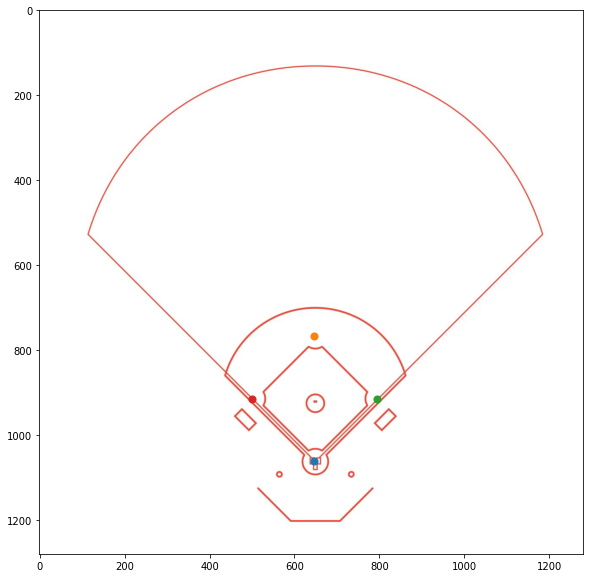

In [10]:

fig = plt.figure(figsize=(10,10))
img = Image.open('../assets/BaseballDiamondScale.jpg')    # Open image as PIL image object

imgplot = plt.imshow(img)
#plt.axis('off')

plt.scatter([647], [1061], s=50) #found home plate by aligning this coordinate with the plate
plt.scatter([647], [767], s=50) #found 2b by aligning this coordinate with the base
distance_from_home_to_second = 1061 - 767
plt.scatter([647+distance_from_home_to_second/2], [1061-distance_from_home_to_second/2], s=50) #found 1b by interpolation
plt.scatter([647-distance_from_home_to_second/2], [1061-distance_from_home_to_second/2], s=50) #found 3b by interpolation
# interpolated points on 1b and 3b confirms infield is to scale
plt.show()




### Let's create a class for convenience, that will load the image and plot coords, then show

In [308]:
# moved to utils/viz_utils.py as Diamond class

#### compare (40, 130) to questionaire image to confirm consistency

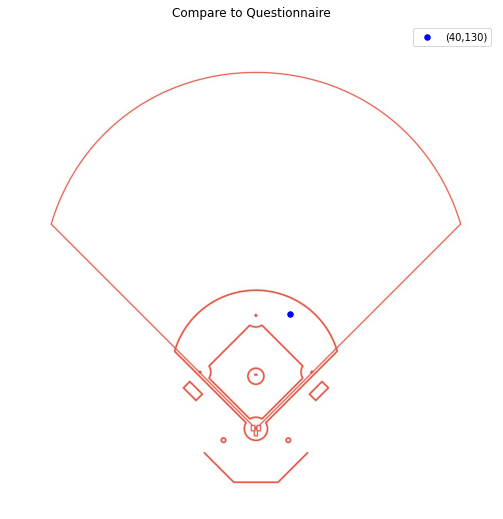

In [13]:
# compare (40, 130) to questionaire image to confirm consistency

diamond = Diamond(scatter_kwargs=dict(s=30, c='b', alpha=1))
diamond.set_coord(40, 130, label='(40,130)')
diamond.show(title='Compare to Questionnaire')

# looks good, just like in the example given

#### plot sample of player locations 

No handles with labels found to put in legend.


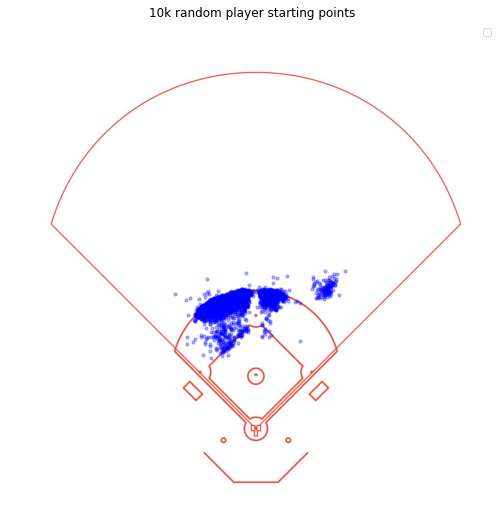

In [14]:
# plot sample of player locations 

diamond = Diamond(scatter_kwargs=dict(s=10, c='b', alpha=0.3))
df.sample(10000)[['player_x', 'player_y']].apply(
    lambda i: diamond.set_coord(i['player_x'], i['player_y']), 
    axis=1
)
diamond.show(title='10k random player starting points')

#### plot landing locations

/Users/dangoldberg/miniconda3/envs/tbj2021/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


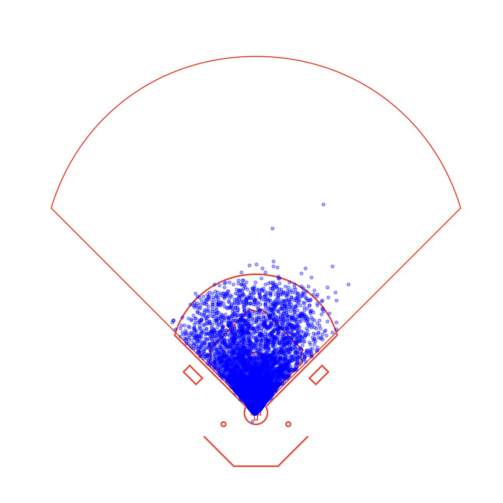

In [205]:
# plot landing locations

diamond = Diamond(scatter_kwargs=dict(s=10, c='b', alpha=0.3))
df.sample(10000)[['landing_location_x', 'landing_location_y']].apply(
    lambda i: diamond.set_coord(i['landing_location_x'], i['landing_location_y']), 
    axis=1
)
diamond.show()

# Explore Other Numeric Columns

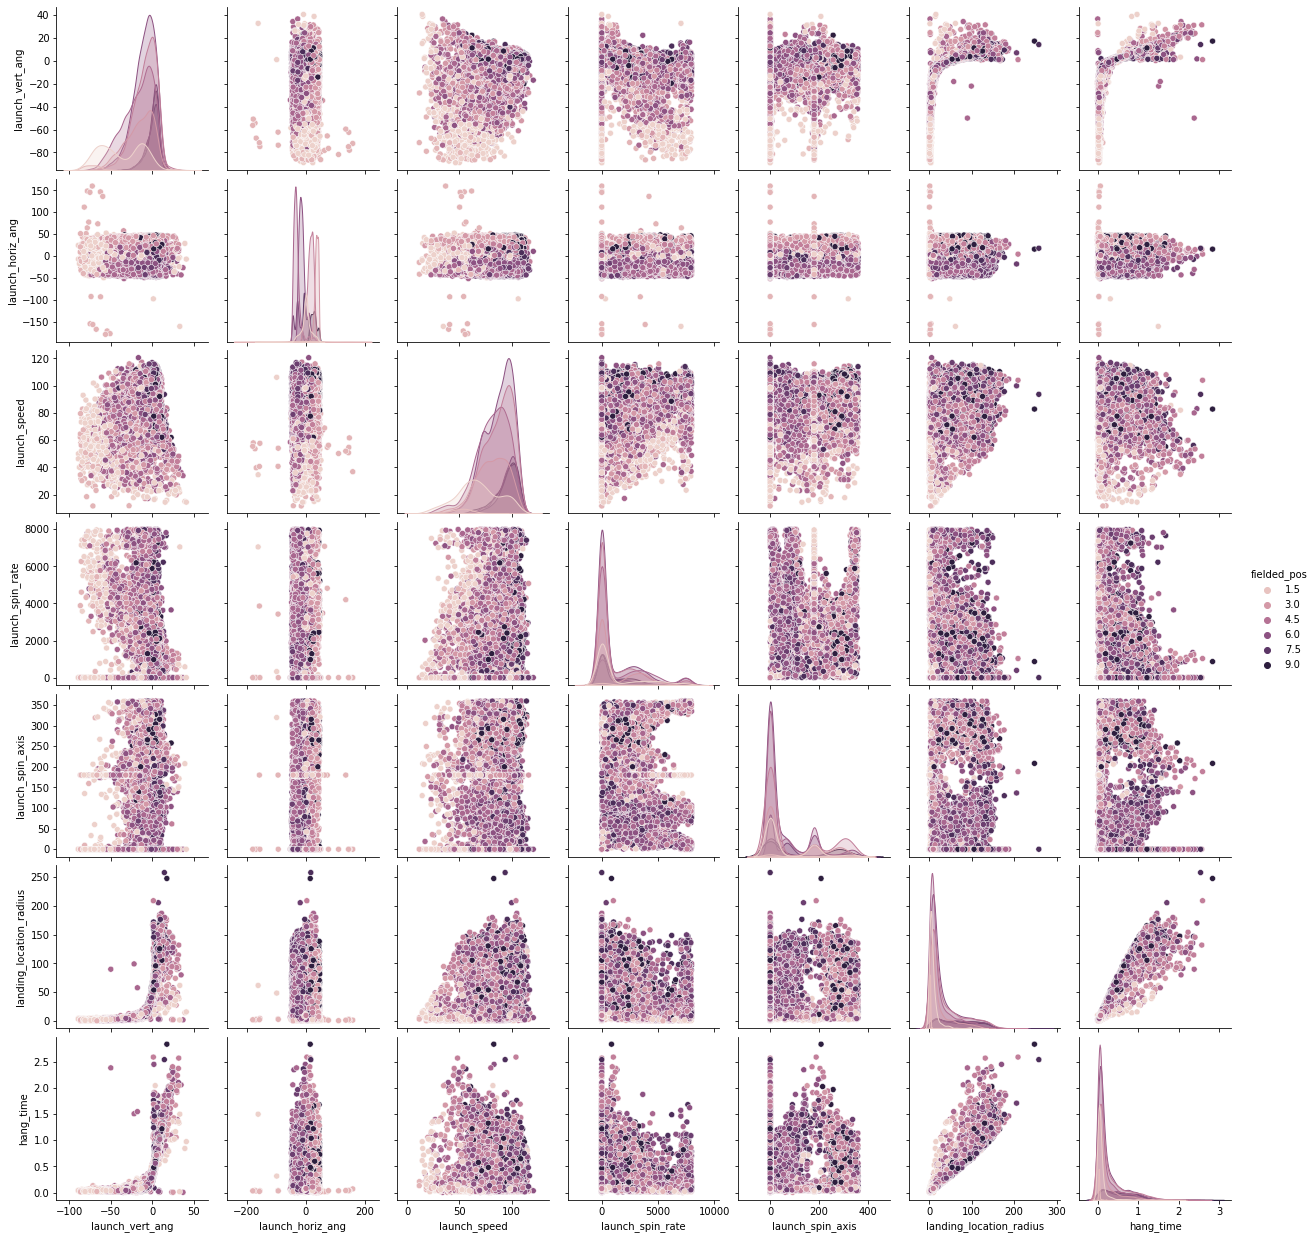

In [216]:
sns.pairplot(data=df[[
    'launch_vert_ang',
    'launch_horiz_ang',
    'launch_speed',
    'launch_spin_rate',
    'launch_spin_axis',
    'landing_location_radius',
    'hang_time',
    'fielded_pos'
]],
    hue="fielded_pos")

plt.show()

### Look at Launch Spin bad data

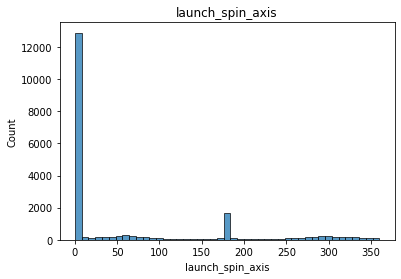

In [225]:
sns.histplot(df, x='launch_spin_axis')
plt.title('launch_spin_axis')
plt.show()

# it looks like there is bad data in the launch_spin_axis field - many records with 0 or 180
# maybe I should ignore this column for now

(5930, 28)


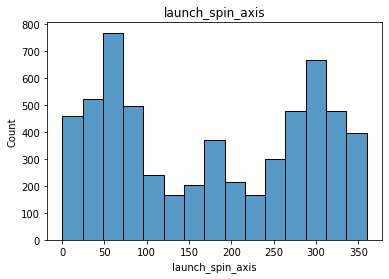

In [229]:
clean_launch_spin_axis = df[(df['launch_spin_axis'] != 0) & (df['launch_spin_axis'] != 180)]
print(clean_launch_spin_axis.shape)

sns.histplot(clean_launch_spin_axis, x='launch_spin_axis')
plt.title('launch_spin_axis')
plt.show()

# it looks like there is bad data in the launch_spin_axis field - many records with 0 or 180
# maybe I should ignore this column for now

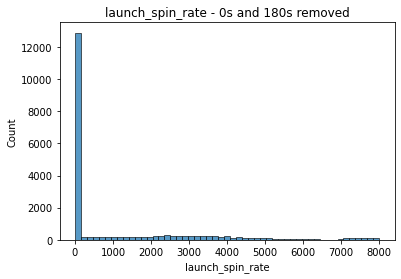

In [233]:
sns.histplot(df, x='launch_spin_rate')
plt.title('launch_spin_rate - 0s and 180s removed')
plt.show()

# it looks like there is bad data in the launch_spin_rate field - many records with 0
# maybe I should ignore this column for now

(7445, 28)


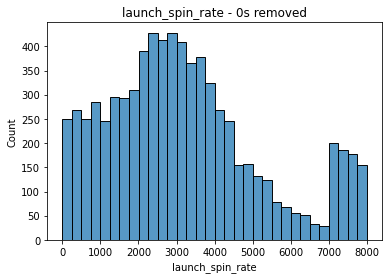

In [234]:
clean_launch_spin_rate = df[(df['launch_spin_rate'] != 0)]
print(clean_launch_spin_rate.shape)

sns.histplot(clean_launch_spin_rate, x='launch_spin_rate')
plt.title('launch_spin_rate - 0s removed')
plt.show()

# it looks like there is bad data in the launch_spin_rate field - many records with 0
# maybe I should ignore this column for now

### Look at other Launch Characteristics

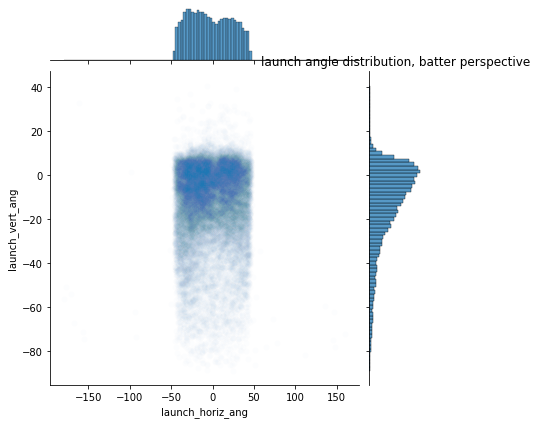

In [246]:
sns.jointplot(data=df, x='launch_horiz_ang', y='launch_vert_ang', alpha=0.01)
plt.title('launch angle distribution, batter perspective')
plt.show()


### What results of the play do we have

In [251]:
df.groupby('playtype').count()['id'].sort_values(ascending=False)

playtype
hit_into_play           14451
hit_into_play_no_out     4246
hit_into_play_score      1454
Name: id, dtype: int64

In [250]:
df.groupby('eventtype').count()['id'].sort_values(ascending=False)

eventtype
field_out                    11848
single                        4323
force_out                     1351
grounded_into_double_play     1285
field_error                    486
double                         422
fielders_choice                152
fielders_choice_out            123
sac_bunt                       118
triple                          23
double_play                     14
batter_interference              5
triple_play                      1
Name: id, dtype: int64

In [252]:
df.groupby('fielded_scoring').count()['id'].sort_values(ascending=False)

fielded_scoring
f_assist            13223
f_fielded_ball       4496
f_putout             1545
f_fielding_error      333
f_deflection          326
f_throwing_error      226
Name: id, dtype: int64

# Does landing_location_radius match euclidean distance from home to landing x,y?

In [260]:
euclidean_distance_from_home_to_landing = (df['landing_location_x'].pow(2) + df['landing_location_y'].pow(2)).pow(1/2)
(df['landing_location_radius'] - euclidean_distance_from_home_to_landing).max()

# max difference from euclidean distance is 0.0001 feet; looks like landing_location_radius is what i thought it was

0.00010500704985361153

# Can I find the minimum distance from the batter to the trajectory of the ball?

#### Questions

- What are some features I can create?
    - Features around projection to ray of ball trajectory; how far is the player's starting point to that traj point? How far is that traj point to the base(s) of interest? How far from player and from traj point did the ball land?

In [395]:
traj

(array([87.20036863]), array([122.04956252]))

/Users/dangoldberg/Desktop/code/interviews/tbj/tbj_202101/notebooks/utils/viz_utils.py:82: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


                                  3433
id                             4002701
playerid                        163714
pos                                  6
player_x                    -58.081170
player_y                    135.161400
player_vx                     0.697273
player_vy                    -0.380478
playtype                 hit_into_play
eventtype                    field_out
trajectory                           G
fielded_pos                   5.000000
fieldingplay                 53.000000
fielded_scoring               f_assist
player_out_credit                False
is_runnersgoing                  False
is_bunt                          False
launch_vert_ang               2.821670
launch_horiz_ang            -31.875310
launch_speed                 82.459010
launch_spin_rate              0.000000
launch_spin_axis              0.000000
landing_location_radius      72.637390
hang_time                     0.630493
landing_location_x          -38.792560
landing_location_y       

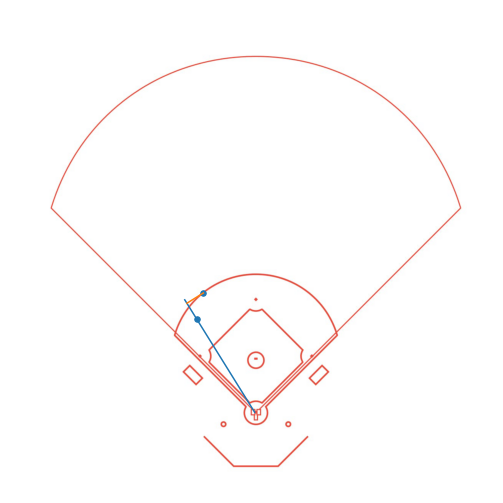

In [18]:

sample = df.sample(1)

traj = geometry.get_launch_trajectory_vector(sample['launch_horiz_ang'].values)
position = sample[['player_x', 'player_y']].values[0]
projection = geometry.get_orthogonal_projection_vector(position, traj)

interception_info = dict(
    launch_speed = sample['launch_speed'].values[0],
    horizonal_angle = sample['launch_horiz_ang'].values,
    player_x = sample['player_x'].values[0],
    player_y = sample['player_y'].values[0]
)

likely_interception_point = geometry.likely_interception_point(
    **interception_info,
    player_speed=20.0
)

diamond = Diamond(scatter_kwargs={'s': 30})
diamond.plot_line_segment((0,0), traj)
diamond.plot_line_segment(position, projection)
diamond.set_coord(*position)
if likely_interception_point is not None:
    diamond.set_coord(*likely_interception_point)
diamond.show()

print(sample.T)

In [19]:
geometry.get_angle_between_vectors(
    diamond.FIRST_BASE_VECTOR - position,
    likely_interception_point - position
)

74.48117870545708

In [21]:
diamond.FIRST_BASE_VECTOR

array([794., 914.])

# Fully functional data viz


In [ ]:
from src.utils.preprocessing import shortstop_global_preprocessing, shortstop_prep_inputs
from src.__init__ import *

df = pd.read_csv('../data/shortstopdefense.csv')
df = shortstop_global_preprocessing(df)
df, X, y, feature_columns, target_name, index = shortstop_prep_inputs(df)